In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [89]:
df = pd.read_csv('Eat - Sheet1.csv'
                 , names=['Alcoholic drinks','Beverages','Caecase meat','Cereals','Cheese','Confectionery','Fat and Oils','Fish','Fresh fruit','Fresh potatoes','Fresh Veg','Other meat','Other Veg','Processed Potatoes','Processed Veg','Soft drinks','Sugars', 'target'])
df.head()

,Alcoholic drinks,Beverages,Caecase meat,Cereals,Cheese,Confectionery,Fat and Oils,Fish,Fresh fruit,Fresh potatoes,Fresh Veg,Other meat,Other Veg,Processed Potatoes,Processed Veg,Soft drinks,Sugars,target
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156,England
1,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139,N Ireland
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147,Scotland
3,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175,Wales


In [90]:
features = ['Alcoholic drinks','Beverages','Caecase meat','Cereals','Cheese','Confectionery','Fat and Oils','Fish','Fresh fruit','Fresh potatoes','Fresh Veg','Other meat','Other Veg','Processed Potatoes','Processed Veg','Soft drinks','Sugars']
x = df.loc[:, features].values


In [91]:
y = df.loc[:,['target']].values


In [92]:
pca = PCA(n_components=2)

In [93]:
principalComponents = pca.fit_transform(x)

In [94]:
df.head()

,Alcoholic drinks,Beverages,Caecase meat,Cereals,Cheese,Confectionery,Fat and Oils,Fish,Fresh fruit,Fresh potatoes,Fresh Veg,Other meat,Other Veg,Processed Potatoes,Processed Veg,Soft drinks,Sugars,target
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156,England
1,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139,N Ireland
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147,Scotland
3,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175,Wales


In [95]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [96]:
principalDf.head(5)

,principal component 1,principal component 2
0,-144.993152,-2.532999
1,477.391639,-58.901862
2,-91.869339,286.081786
3,-240.529148,-224.646925


In [97]:
df[['target']].head()

,target
0,England
1,N Ireland
2,Scotland
3,Wales


In [98]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-144.993152,-2.532999,England
1,477.391639,-58.901862,N Ireland
2,-91.869339,286.081786,Scotland
3,-240.529148,-224.646925,Wales


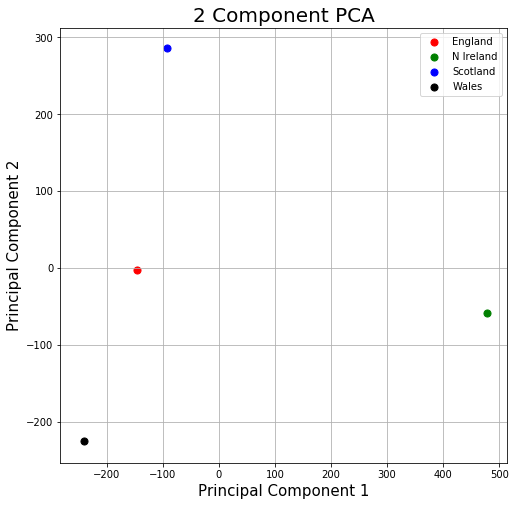

In [99]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['England','N Ireland','Scotland','Wales']
colors = ['r', 'g', 'b','k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()